<a href="https://colab.research.google.com/github/Karthika298/Binary_classification-CNN/blob/main/autism_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from PIL import Image

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
import numpy as np
from keras.applications import VGG16
from keras.models import Model
from keras import optimizers , layers, applications

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
drive_path = '/content/drive/MyDrive/autism/AutismDataset'
print(os.listdir(drive_path))


['test', 'train']


## Creating dataframes for train and Test

In [4]:
filenames = os.listdir("/content/drive/MyDrive/autism/AutismDataset/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
train_df.shape

(2540, 2)

In [5]:
test_filenames = os.listdir("/content/drive/MyDrive/autism/AutismDataset/test")
categories = []
for filename in test_filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': categories
})

In [ ]:
test_df.shape

(300, 2)

* The Training data have **2540 images** which will be further divided into train and valid.
* The test data has **300** images

In [12]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


train_counts = train_df['category'].value_counts()
test_counts = test_df['category'].value_counts()


train_pie_trace = go.Pie(labels=train_counts.index, values=train_counts.values, name='Train Data')

test_pie_trace = go.Pie(labels=test_counts.index, values=test_counts.values, name='Test Data')

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Train Data', 'Test Data'])

fig.add_trace(train_pie_trace, 1, 1)
fig.add_trace(test_pie_trace, 1, 2)


fig.update_layout(title='Distribution of 1s and 0s in Train and Test Data',width=800, height=400)
fig.show()


In [8]:
test_counts

category
1    150
0    150
Name: count, dtype: int64

In [9]:
train_counts

category
1    1270
0    1270
Name: count, dtype: int64

## Model Building

In [ ]:
image_size = 224
input_shape = (image_size, image_size, 3)

#Hyperparameters
epochs = 20
batch_size = 16

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#Initialize the CNN
model = Sequential()

# model.add(Conv2D(16, (3, 3), input_shape=(224, 224, 3), activation='relu'))    # remove
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
##model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  ##replace with rmsprop

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

* **Three convolutional layers** are added:
The first layer has **32 filters of size 3x3**, using **ReLU activation** function followed by **64 and 128 filters** .

* Each convolutional layer is followed by a **max-pooling layer (MaxPooling2D)** to downsample the feature maps.
* Flattens the 3D feature maps into a 1D vector to feed into the fully connected layers.
* **Two dense (fully connected) layers** are added:The first **dense layer has 512 neurons** with ReLU activation function.
* A dropout layer with a **dropout rate of 0.5** is added to prevent overfitting.
* The second dense layer is the output layer with a single neuron and a **sigmoid activation**.

## Distribution of image sizes in pixel in train and test.

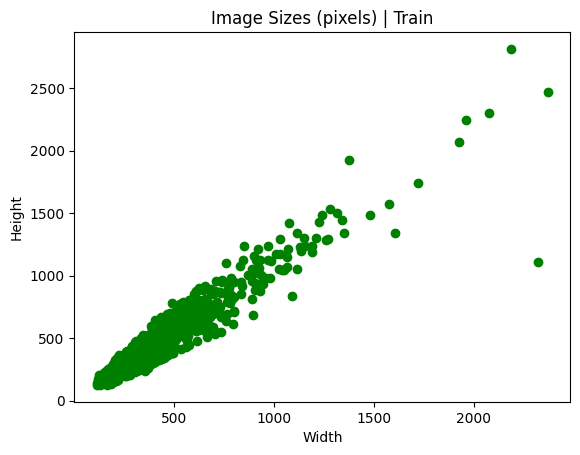

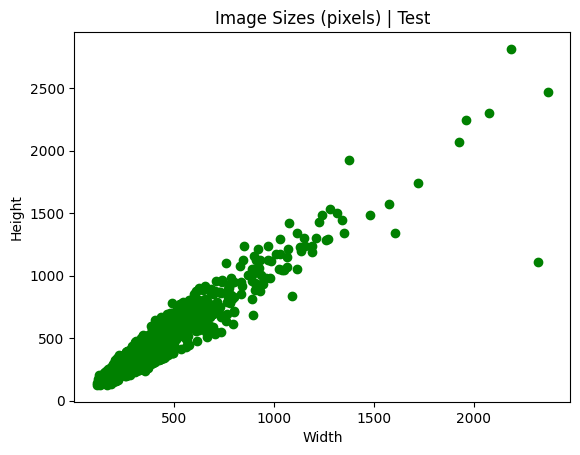

In [ ]:


directories = {
    'Train': '/content/drive/MyDrive/autism/AutismDataset/train/',
    'Test': '/content/drive/MyDrive/autism/AutismDataset/train/'

}


def get_dims(file):
    im = Image.open(file)
    arr = np.array(im)
    h, w, d = arr.shape
    return h, w


for n, d in directories.items():
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    dims = map(get_dims, filelist)
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})


    plt.figure()
    plt.scatter(x='width', y='height', data=sizes, color='green')
    plt.title('Image Sizes (pixels) | {}'.format(n))
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()


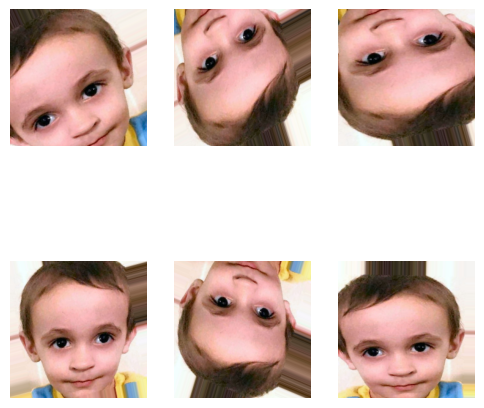

In [ ]:
image_path='/content/drive/MyDrive/autism/AutismDataset/train/Autistic.0.jpg'

img = keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)  # Convert the PIL image to a NumPy array
img_tensor = np.expand_dims(img_array, axis=0)

# Uses ImageDataGenerator to apply data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    shear_range=0.2,
    zoom_range=0.2,  # randomly zoom image
    horizontal_flip=True,
    vertical_flip=True,  # randomly flip images
    width_shift_range=0.1,
    height_shift_range=0.1,
)

augmented_images = datagen.flow(img_tensor, batch_size=1)

plt.figure(figsize=(6, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    augmented_image = augmented_images.next()[0].astype('uint8')  # Get the next augmented image
    plt.imshow(augmented_image)
    plt.axis('off')
plt.show()


**Augmentation techniques with Keras ImageDataGenerator class**
*  We can **randomly rotate** images through any degree between **0 and 360**.
* Once rotated , some pixels  move outside the image and leave  empty area that needs to be filled in using the **fill_mode**. Default  value is **nearest**.
*  **height_shift_range and width_shift_range** indicates the percentage of width or height of the image to shift.(float values).
*   We can flip the image along the vertical or the horizontal axis ,using **horizontle_flip and vertical_flip**.
* **zoom_range** randomly zooms the image .

In [ ]:
# Prepare Test and Train Data
train_df, validate_df = train_test_split(train_df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [ ]:
# Training Generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/drive/MyDrive/autism/AutismDataset/train/",
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2286 validated image filenames belonging to 2 classes.


In [ ]:
# Validation Generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/drive/MyDrive/autism/AutismDataset/train/",
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 254 validated image filenames belonging to 2 classes.


In [ ]:
#Fit Model
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)


<ipython-input-13-d06c556e144e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
142/142 [==============================] - 86s 300ms/step - loss: 0.7723 - accuracy: 0.5850 - val_loss: 0.6619 - val_accuracy: 0.6458
Epoch 2/20
142/142 [==============================] - 47s 329ms/step - loss: 0.6611 - accuracy: 0.6238 - val_loss: 0.6468 - val_accuracy: 0.6542
Epoch 3/20
142/142 [==============================] - 40s 283ms/step - loss: 0.6363 - accuracy: 0.6463 - val_loss: 0.6067 - val_accuracy: 0.6542
Epoch 4/20
142/142 [==============================] - 40s 283ms/step - loss: 0.6208 - accuracy: 0.6709 - val_loss: 0.5611 - val_accuracy: 0.7083
Epoch 5/20
142/142 [==============================] - 41s 285ms/step - loss: 0.5961 - accuracy: 0.6930 - val_loss: 0.5490 - val_accuracy: 0.7250
Epoch 6/20
142/142 [==============================] - 40s 282ms/step - loss: 0.5803 - accuracy: 0.6912 - val_loss: 0.5433 - val_accuracy: 0.7458
Epoch 7/20
142/142 [==============================] - 41s 286ms/step - loss: 0.5671 - accuracy: 0.7040 - val_loss: 0.5025 - val_ac

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

<ipython-input-14-5bf9ded073bc>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)


Test: accuracy = 0.812500  ;  loss = 0.447287 


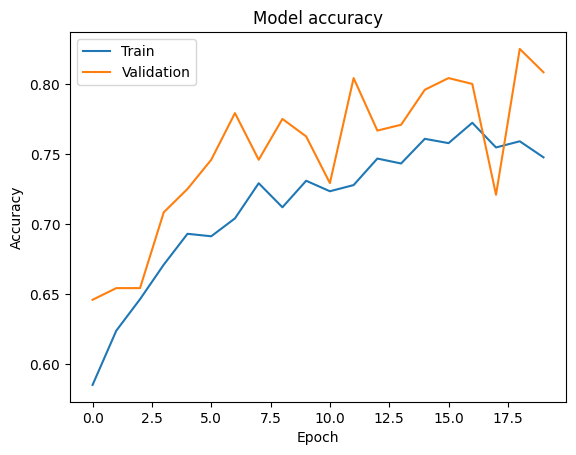

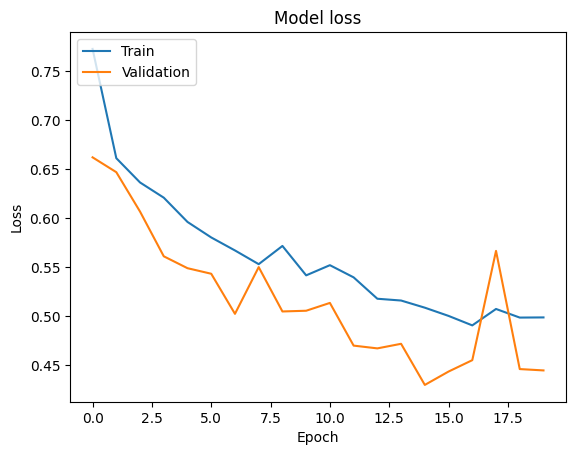

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
#Prepare Testing
test_filenames = os.listdir("/content/drive/MyDrive/autism/AutismDataset/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
#Create Testing Generator
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/content/drive/MyDrive/autism/AutismDataset/test/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 300 validated image filenames.


In [ ]:
# Predict
threshold = 0.5
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

<ipython-input-18-f1c006b9a8dc>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


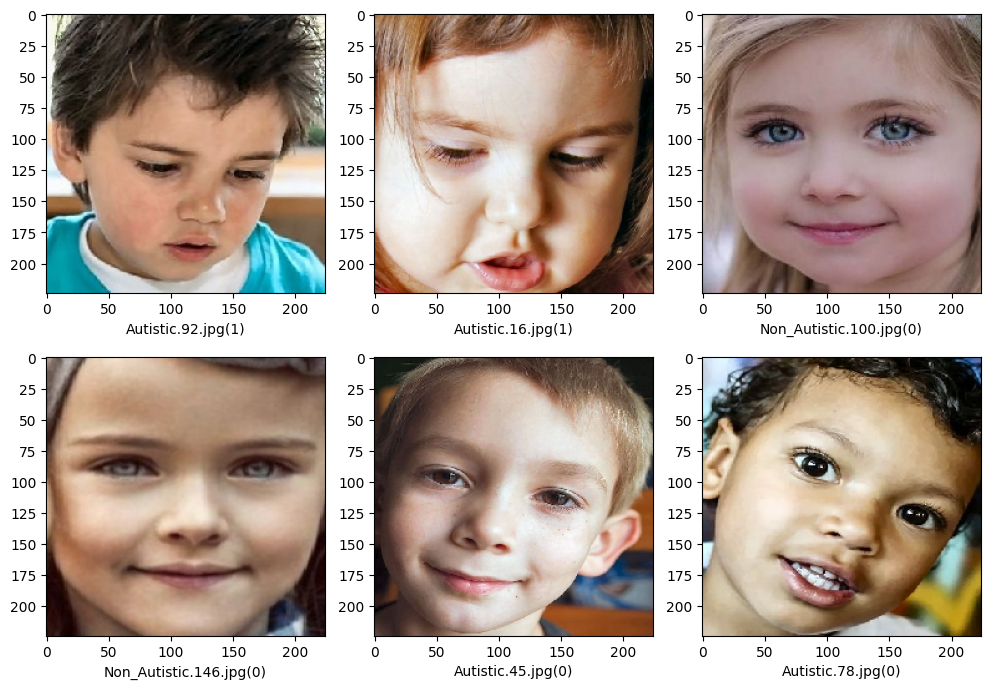

In [ ]:

sample_test = test_df.sample(n=6).reset_index()
sample_test.head()
plt.figure(figsize=(10, 10))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/MyDrive/autism/AutismDataset/test/"+filename, target_size=(224, 224))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()